# Thyroid Disease Detection

##### Life cycle of Thyroid disease Detector
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data preprocessing
- Model Training
- Choose best model

## 1) Problem Statement

- Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.


## 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/102/thyroid+disease
- From Garavan Institute
- Documentation: as given by Ross Quinlan
- 6 databases from the Garavan Institute in Sydney, Australia
- Approximately the following for each database:

    ** 2800 training (data) instances and 972 test instances
    ** Plenty of missing data
    ** 29 or so attributes, either Boolean or continuously-valued 

- 2 additional databases, also from Ross Quinlan, are also here

    ** Hypothyroid.data and sick-euthyroid.data
    ** Quinlan believes that these databases have been corrupted
    ** Their format is highly similar to the other databases 

- A Thyroid database suited for training ANNs

    ** 3 classes
    ** 3772 training instances, 3428 testing instances
    ** Includes cost data (donated by Peter Turney) 

### 2.1 Import Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn, regular expression and Os Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import re

### Setting DataFrame max Rows and Columns view
- Maximum columns: 5000
- Maximum rows: All

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10000)

In [3]:
final_dataset=pd.read_csv('')

## 5) Datachecks to performs

- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 5.1 Checking Missing values

In [4]:
final_dataset.isnull().sum()

age                            16
disease                         0
fti                           641
fti_measured                    1
goitre                          1
hypopituitary                 124
i131_treatment                124
lithium                         1
on_antithyroid_medication       1
on_thyroxine                    1
pregnant                        1
psych                         124
query_hyperthyroid              1
query_hypothyroid               1
query_on_thyroxine              1
referral_source               124
sex                           270
sick                            1
t3                           1395
t3_measured                     1
t4u                           645
t4u_measured                    1
tbg                          6845
tbg_measured                    1
thyroid_surgery                 1
tsh                           615
tsh_measured                    1
tt4                           371
tt4_measured                    1
tumor         

#### Missing values in dataset
- age --> 450
- sex --> 930
- I131_treatment --> 3163
- hypopituitary --> 3163
- psych --> 3163
- TSH --> 2730
- T3 --> 6224
- TT4 --> 1611
- T4U --> 2542
- FTI --> 2542
- TBG --> 25726
- referral_source --> 3163

### 5.2 Checking datatypes

In [5]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6856 entries, 0 to 6855
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6840 non-null   float64
 1   disease                    6856 non-null   object 
 2   fti                        6215 non-null   float64
 3   fti_measured               6855 non-null   object 
 4   goitre                     6855 non-null   object 
 5   hypopituitary              6732 non-null   object 
 6   i131_treatment             6732 non-null   object 
 7   lithium                    6855 non-null   object 
 8   on_antithyroid_medication  6855 non-null   object 
 9   on_thyroxine               6855 non-null   object 
 10  pregnant                   6855 non-null   object 
 11  psych                      6732 non-null   object 
 12  query_hyperthyroid         6855 non-null   object 
 13  query_hypothyroid          6855 non-null   objec

##### float datatype features: 
- age
- TSH
- T3
- TT4
- T4U
- FTI
- TBG

##### object datatype features:
- sex
- referral_source
- disease

##### int datatype features:
 -  on_thyroxine
 -   query_on_thyroxine
 -   on_antithyroid_medication
 -   sick
 -   pregnant
 -  thyroid_surgery
 -  I131_treatment
 -   query_hypothyroid
 -  query_hyperthyroid
 -  lithium
 -  goitre 
 -  tumor 
 -  hypopituitary
 -  psych
 -  TSH_measured
 -  T3_measured
 -  TT4_measured
 -  T4U_measured
 -  FTI_measured
 -  TBG_measured

### 5.3 Checking the number of unique values in each feature

In [6]:
final_dataset.nunique()

age                           93
disease                        9
fti                          291
fti_measured                   2
goitre                         2
hypopituitary                  2
i131_treatment                 2
lithium                        2
on_antithyroid_medication      2
on_thyroxine                   2
pregnant                       2
psych                          2
query_hyperthyroid             2
query_hypothyroid              2
query_on_thyroxine             2
referral_source                5
sex                            2
sick                           2
t3                            78
t3_measured                    2
t4u                          149
t4u_measured                   2
tbg                            7
tbg_measured                   2
thyroid_surgery                2
tsh                          351
tsh_measured                   2
tt4                          277
tt4_measured                   2
tumor                          2
dtype: int

### 5.4 Check statistics of data set

In [7]:
final_dataset.describe()

,age,fti,t3,t4u,tbg,tsh,tt4
count,6840.000000,6215.000000,5461.000000,6211.000000,11.000000,6241.000000,6485.000000
mean,51.906287,109.480594,2.016596,0.996066,26.090909,9.393479,106.869662
std,19.603710,44.047930,0.989748,0.195113,4.504543,35.913508,42.306922
min,1.000000,0.000000,0.000000,0.250000,18.000000,0.000000,2.000000
25%,36.000000,90.000000,1.500000,0.880000,23.500000,0.500000,85.000000
50%,55.000000,106.000000,2.000000,0.980000,28.000000,1.600000,102.000000
75%,67.000000,125.000000,2.400000,1.090000,28.000000,3.700000,125.000000
max,455.000000,839.000000,18.000000,2.320000,34.000000,530.000000,430.000000


###### Insights
- min value for each feature is 0 except age and TT4 feature
- high difference in standard deviation of each feature
- high difference in count value of TBG with respect to other features

## Checking duplicate values in dataset 

In [8]:
print(f"Duplicated values: {final_dataset.duplicated().sum()}")

Duplicated values: 2264


## 6) Exploring Data (Visualization)

In [9]:
num_features=[features for features in final_dataset.columns if final_dataset[features].dtypes=='float64']

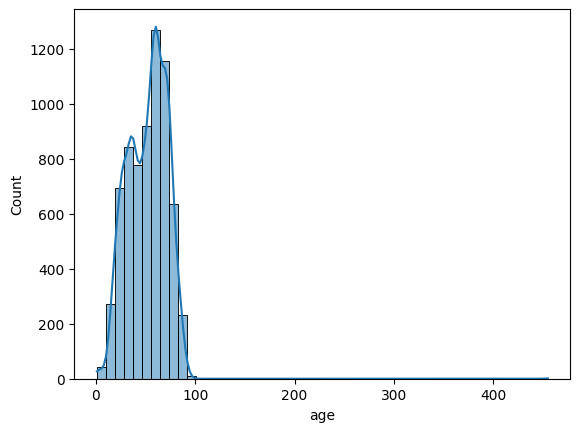

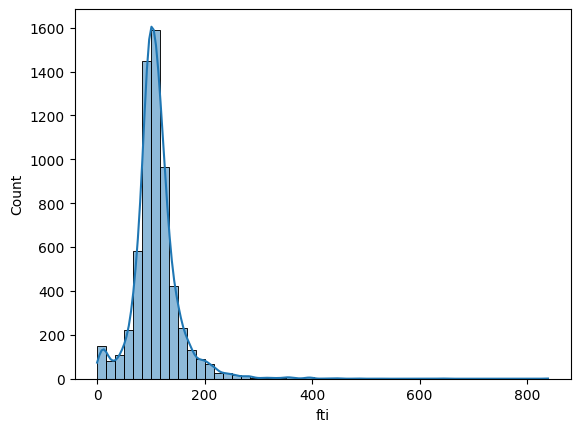

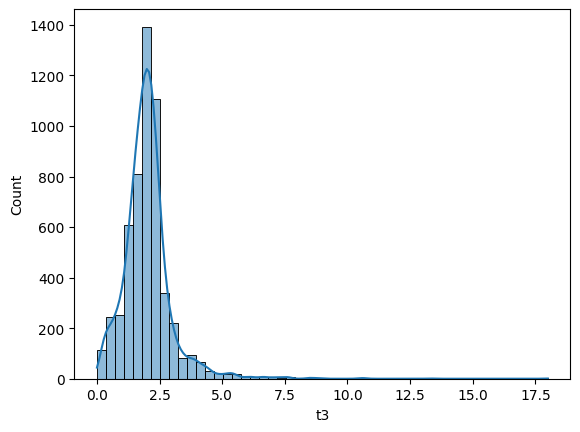

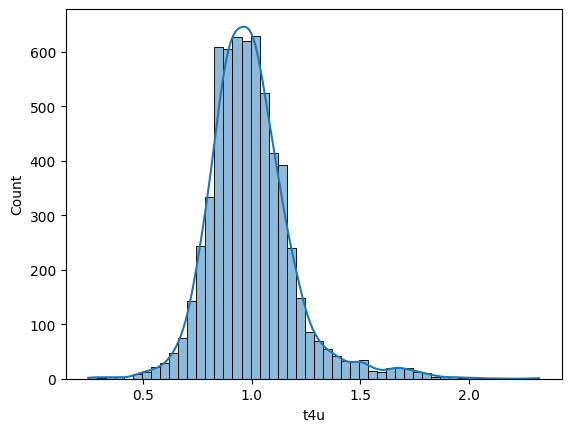

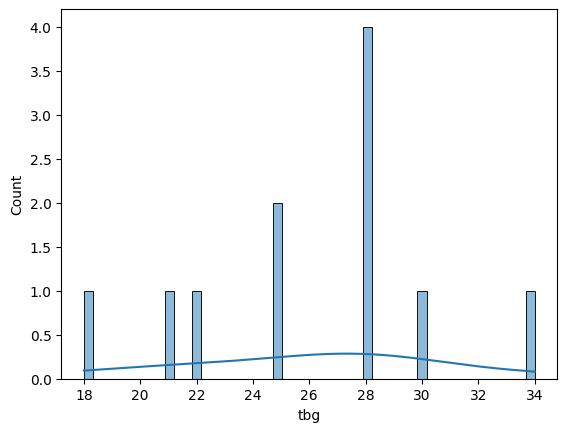

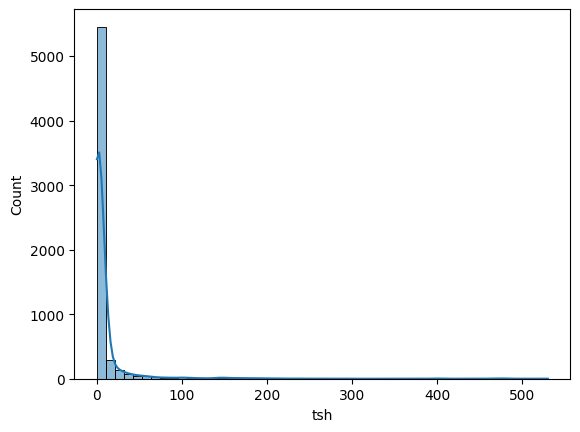

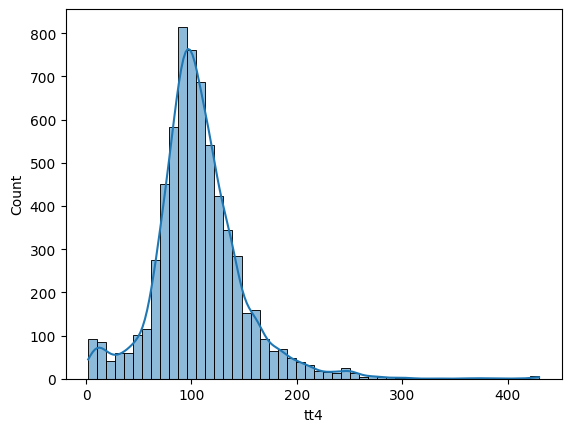

In [10]:
for features in num_features:
    sns.histplot(final_dataset[features],bins=50,kde=True)
    plt.show()

### 6.1 visualizing the correlation strength of each numerical feature

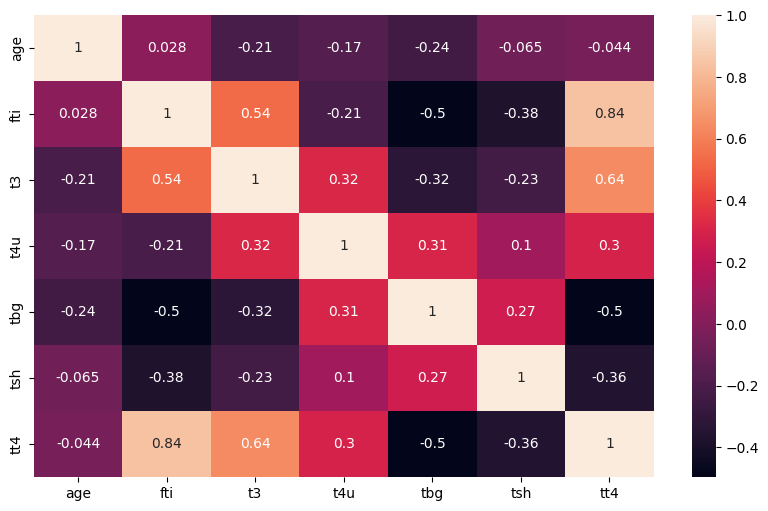

In [11]:
plt.subplots(figsize=(10,6))
sns.heatmap(final_dataset[num_features].corr(), annot=True)
plt.show()

###### Insights
- High correlation between FTI and TT4
- High correlation between T4U and TBG

### 6.2 Checking relation of disease feature with numerical features

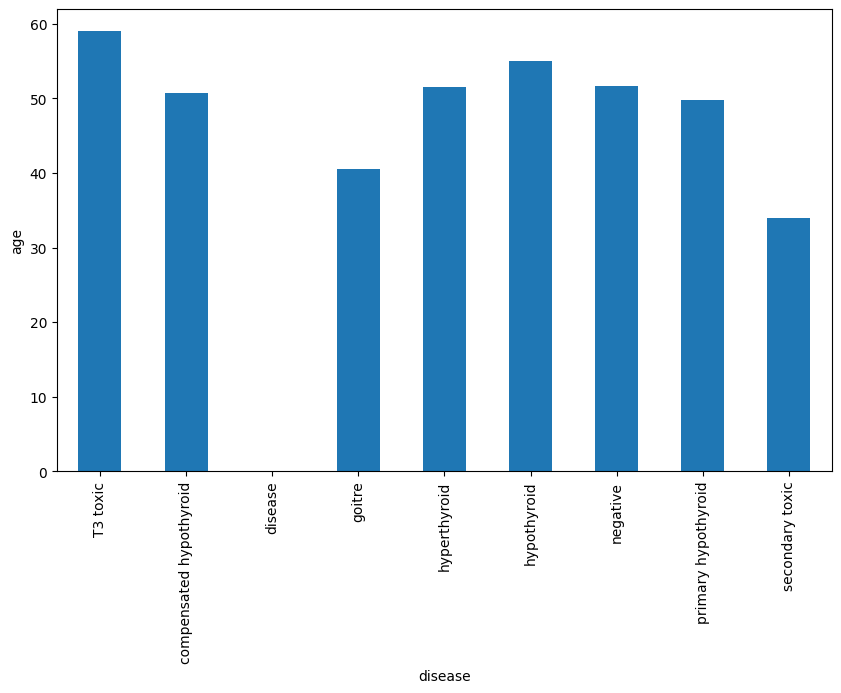

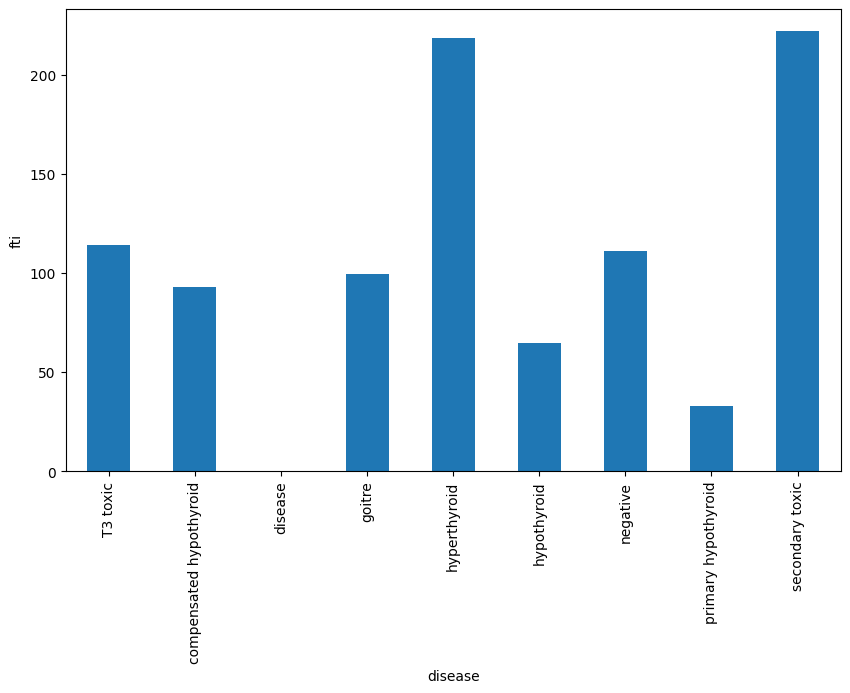

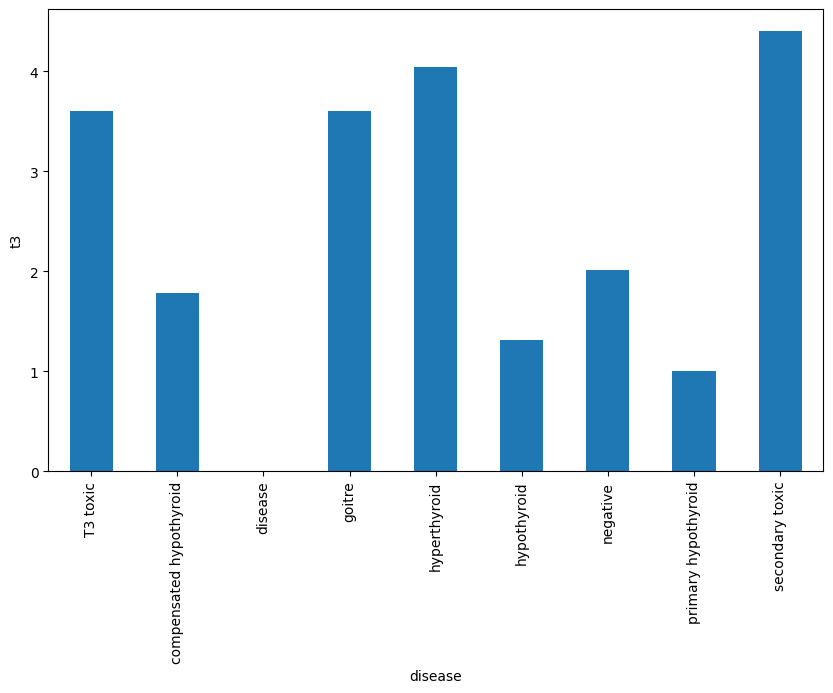

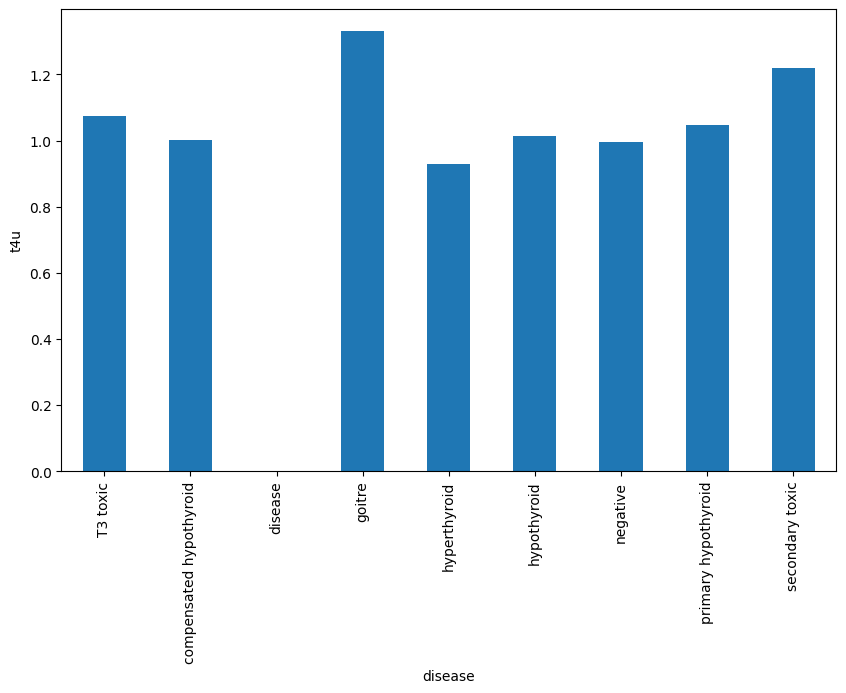

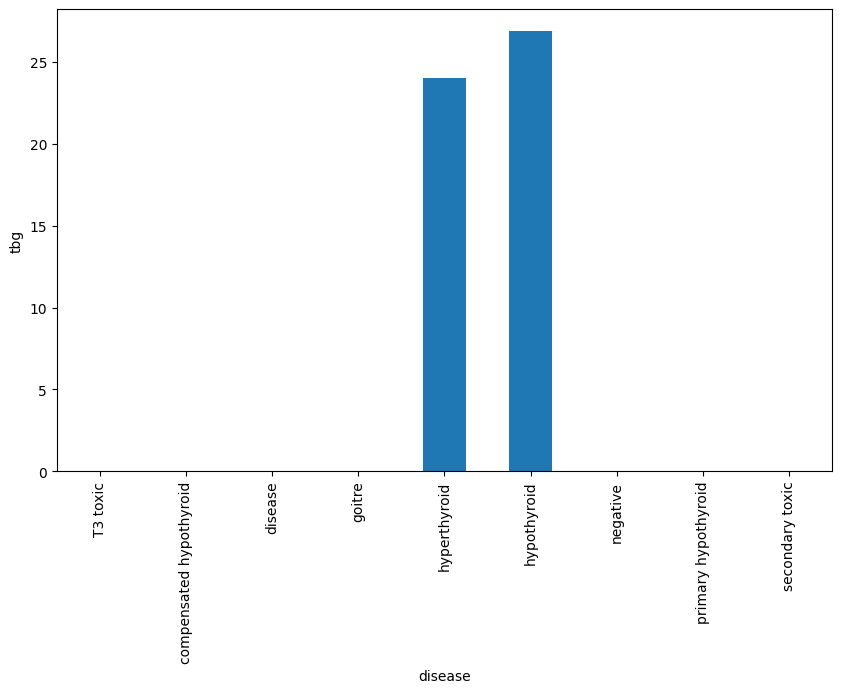

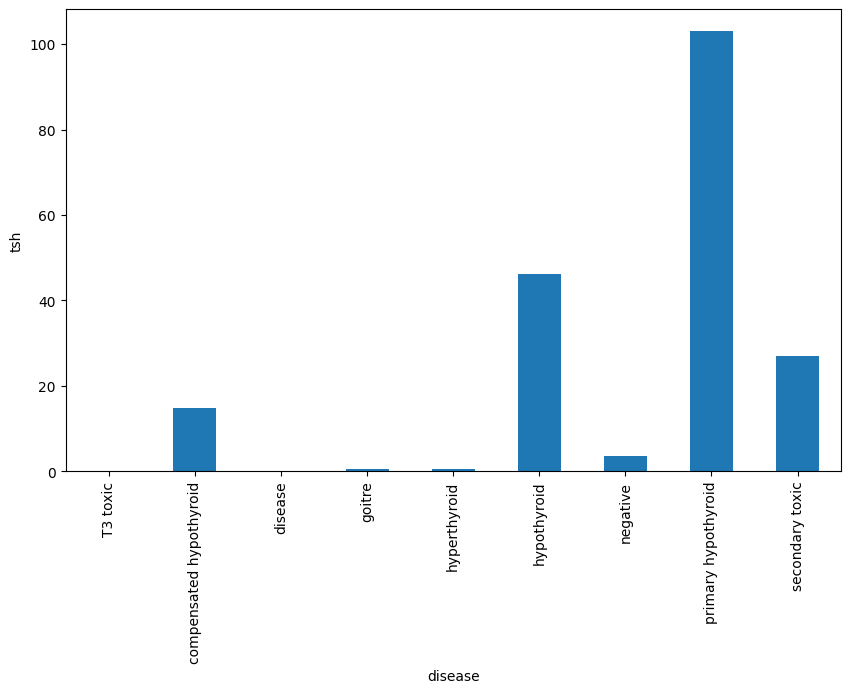

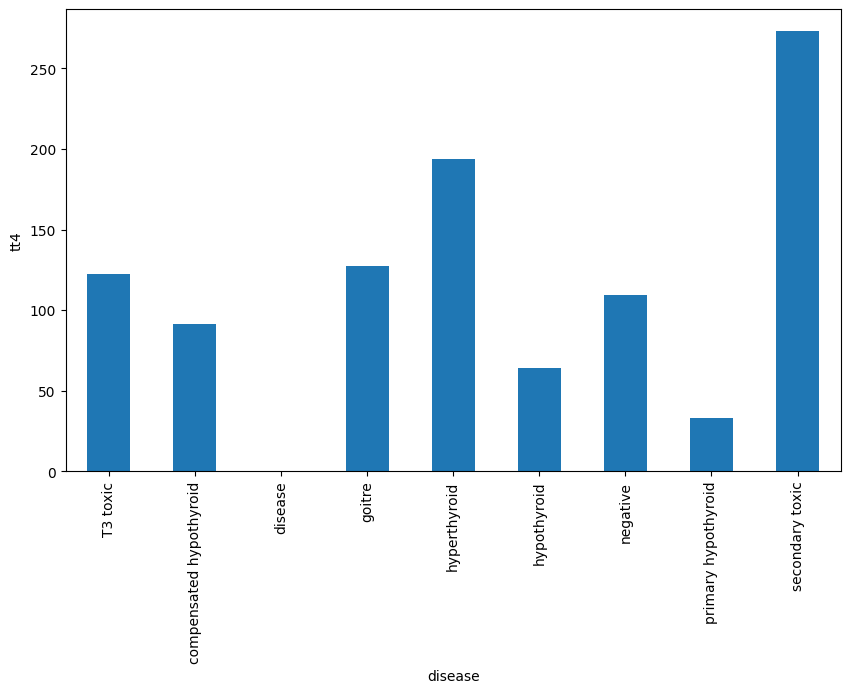

In [12]:
for features in num_features:
    temp=final_dataset.copy()
    plt.subplots(figsize=(10,6))
    temp.groupby('disease')[features].mean().plot.bar()
    plt.xlabel('disease')
    plt.ylabel(features)
    plt.show()

### 6.3 Checking outliers in numerical features

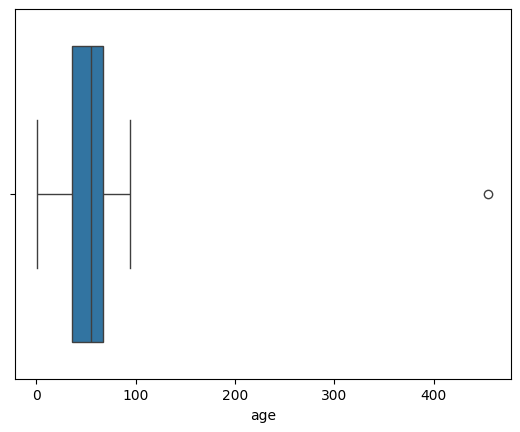

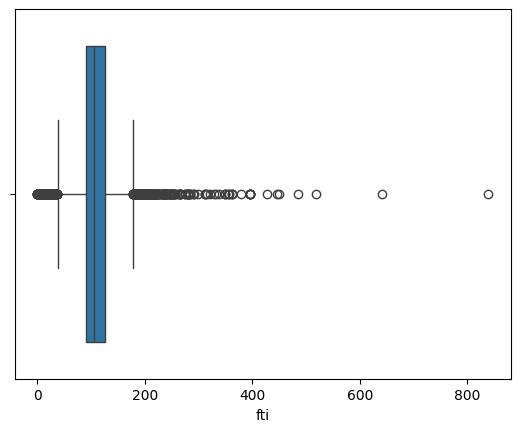

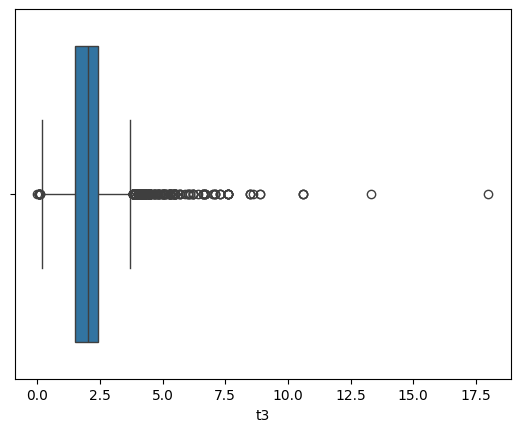

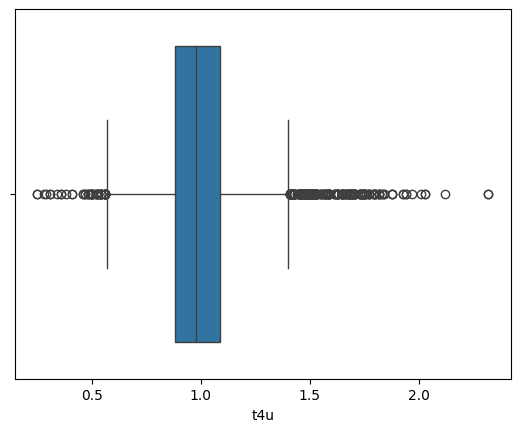

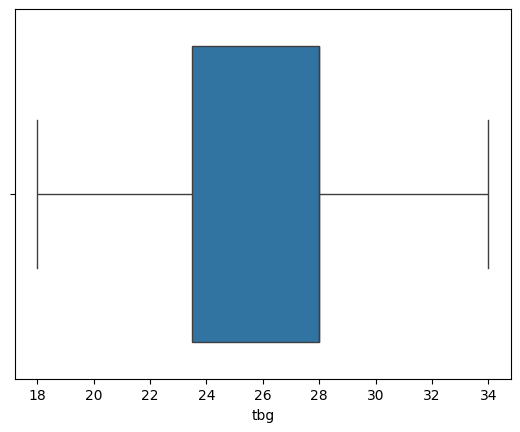

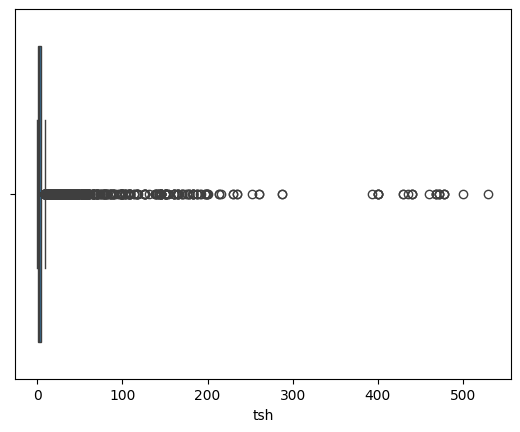

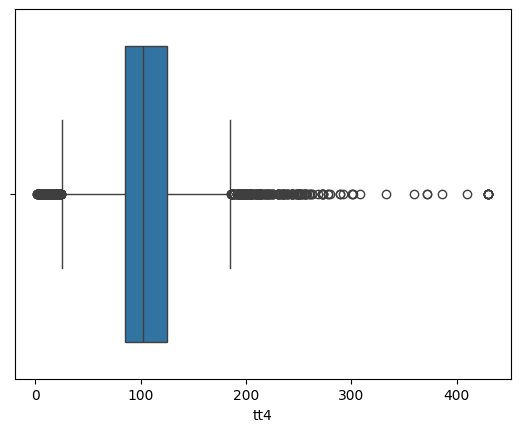

In [13]:
for features in num_features:
    if features!='TBG':
        sns.boxplot(final_dataset,x=final_dataset[features])
        plt.show()

### 6.4 Visualizing the correlation strength of boolean category features

In [14]:
bool_features=[features for features in final_dataset.columns if final_dataset[features].dtypes=='int64']

###### Insights
- FTI_measured ,T4U_measured and TT4_measured has high correlation
- FTI_masured and T4U_measured has highly strong correlation

### Checking relation b/w 
### 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured' 
### and 
### 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'

In [16]:
measured_bool_features=[features for features in final_dataset.columns if '_measured' in features]

In [17]:
for features in measured_bool_features:
    print("Missing values:",final_dataset.loc[:,features.replace('_measured',"")].isnull().sum())
    print(features+": ")
    print(final_dataset[features].value_counts())

Missing values: 641
fti_measured: 
fti_measured
True     6215
False     640
Name: count, dtype: int64
Missing values: 1395
t3_measured: 
t3_measured
True     5461
False    1394
Name: count, dtype: int64
Missing values: 645
t4u_measured: 
t4u_measured
True     6211
False     644
Name: count, dtype: int64
Missing values: 6845
tbg_measured: 
tbg_measured
False    6844
True       11
Name: count, dtype: int64
Missing values: 615
tsh_measured: 
tsh_measured
True     6241
False     614
Name: count, dtype: int64
Missing values: 371
tt4_measured: 
tt4_measured
True     6485
False     370
Name: count, dtype: int64


#### Insight:
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')


- True value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents non-missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')

### 6.5 Bivariate analysis

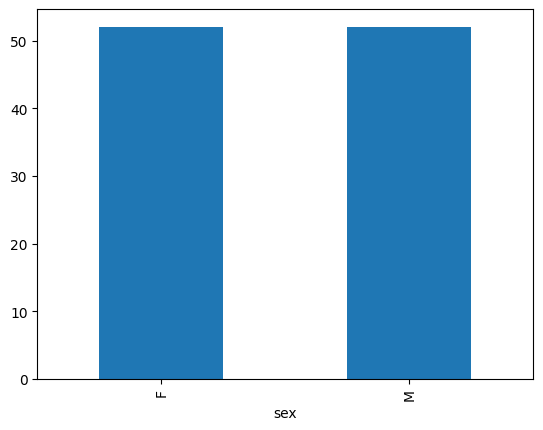

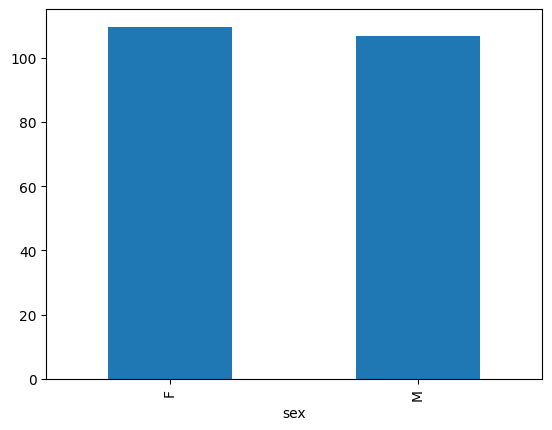

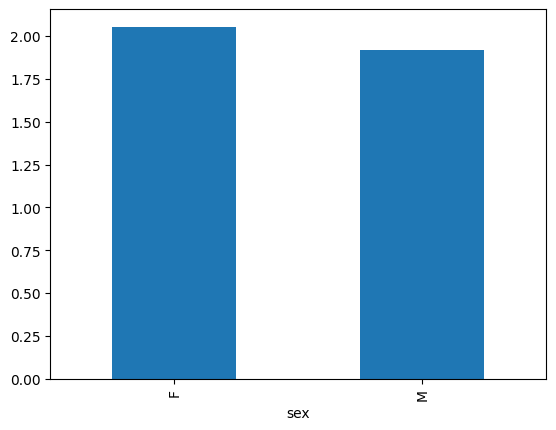

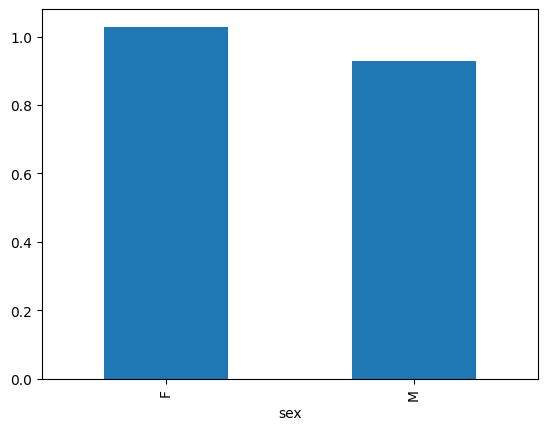

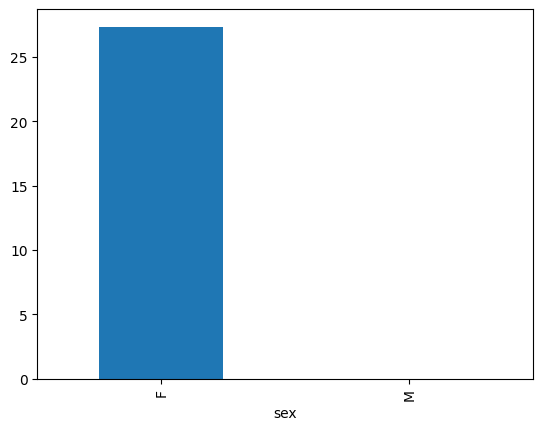

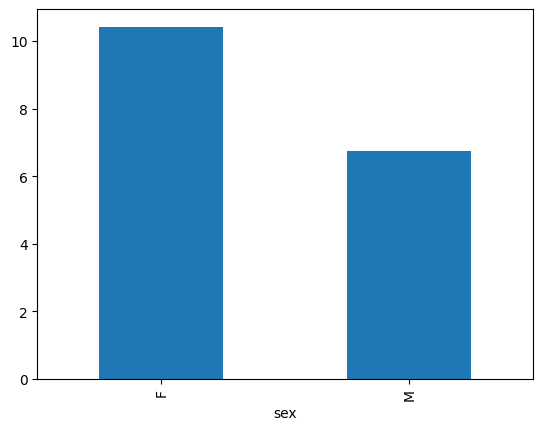

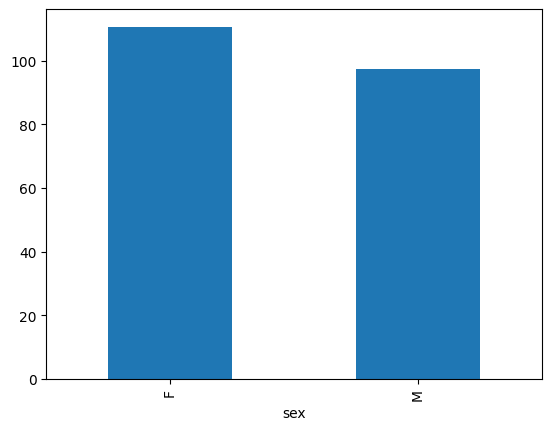

In [18]:
for features in num_features:
    temp=final_dataset.copy()
    temp.groupby('sex')[features].mean().plot.bar()
    plt.show()

### 6.6 Multivariate Analysis

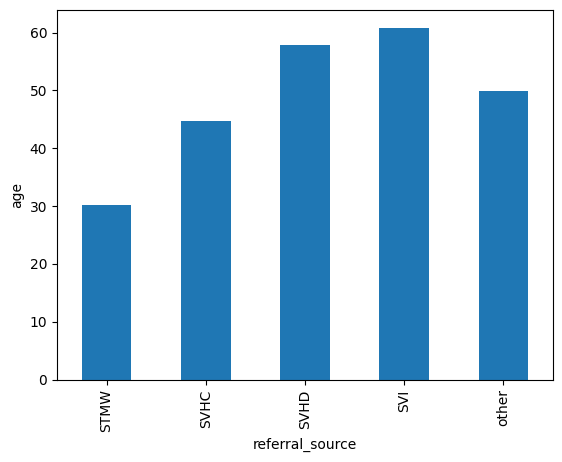

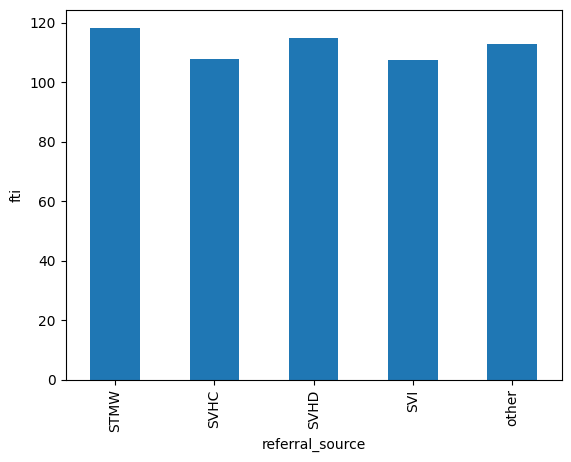

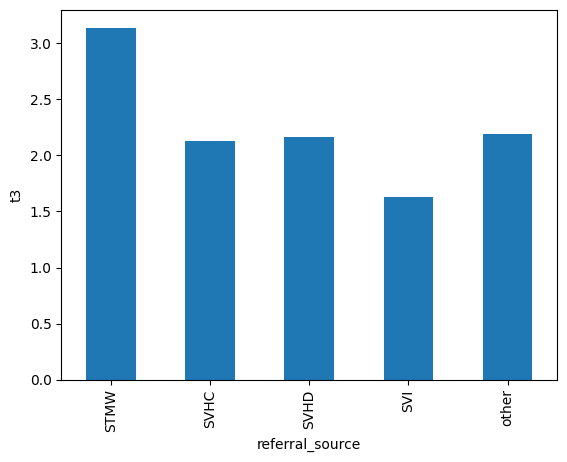

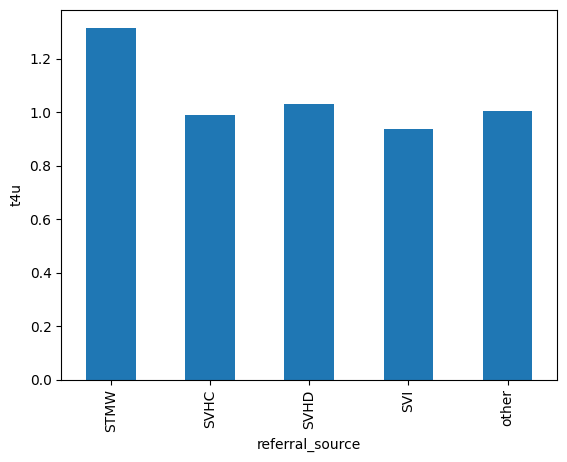

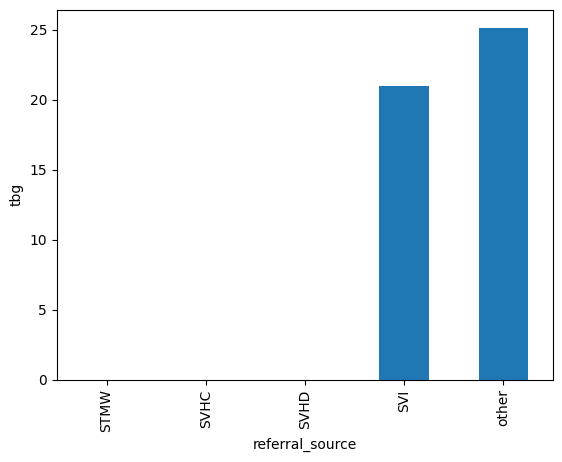

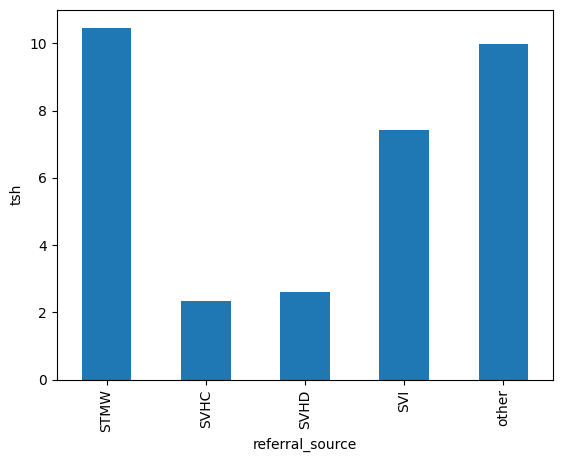

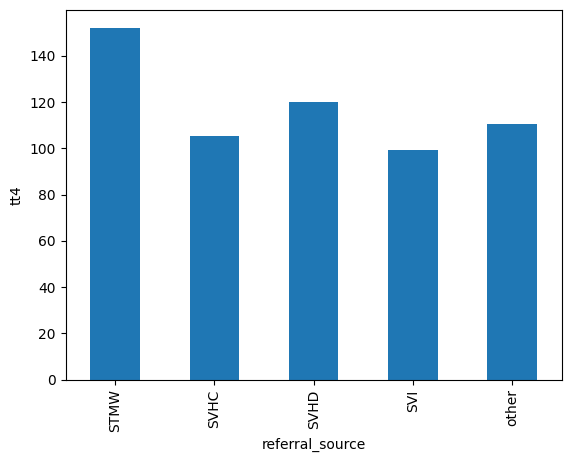

In [19]:
for features in num_features:
    temp=final_dataset.copy()
    temp.groupby('referral_source')[features].mean().plot.bar()
    plt.ylabel(features)
#     sns.barplot(x=final_dataset['referral_source'], y=final_dataset[features])
    plt.show()

### Conclusion:
- Disease features contains various classes which related to each other
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')
- Females has more occurence of disease as compared to Males

### Checking the affect of outlier on disease category classes

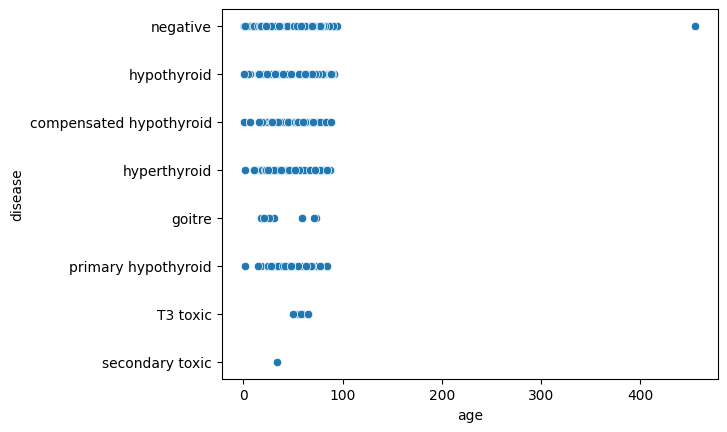

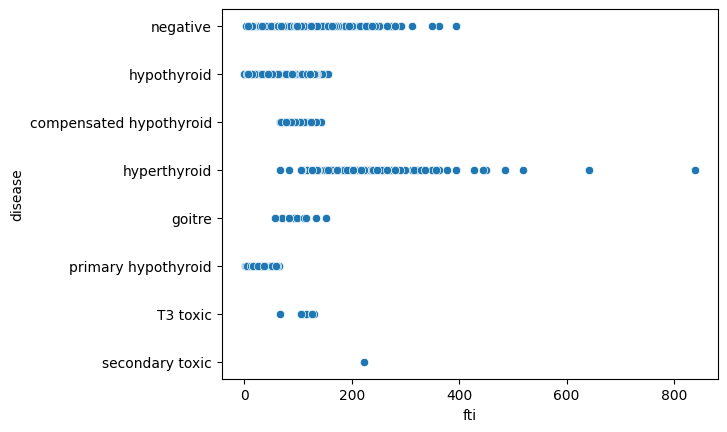

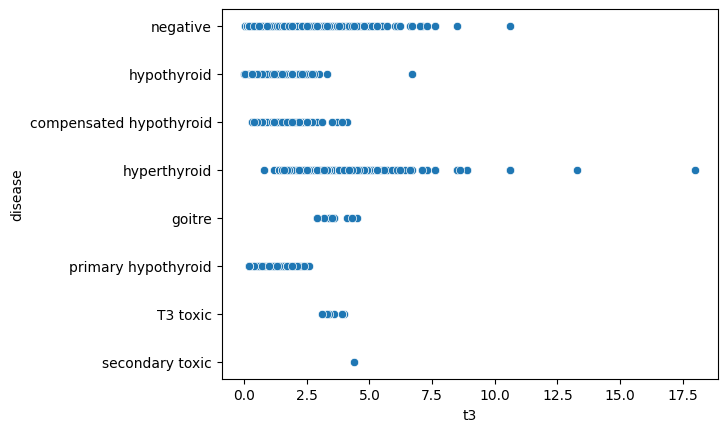

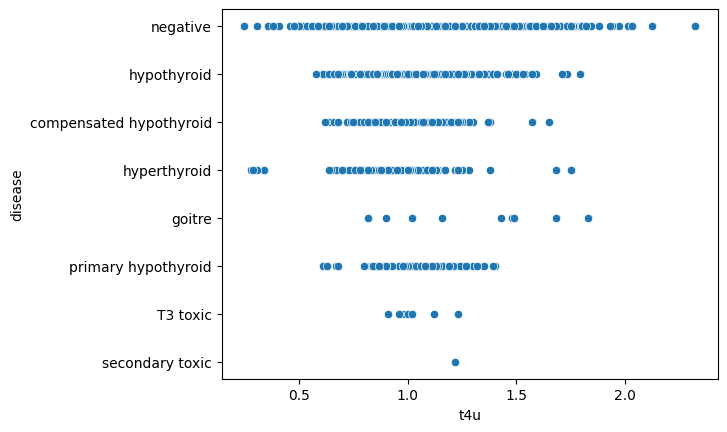

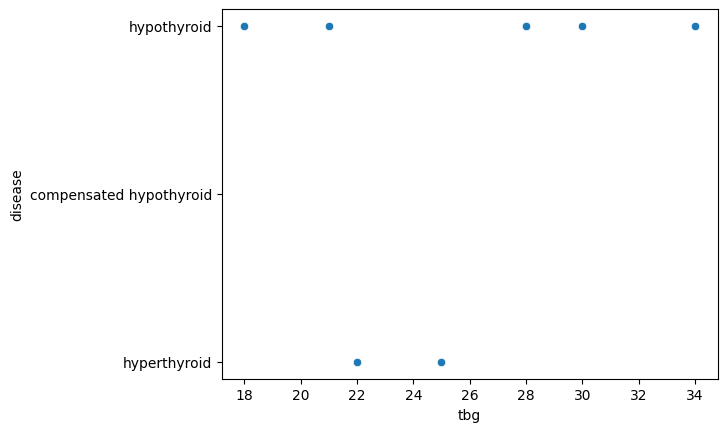

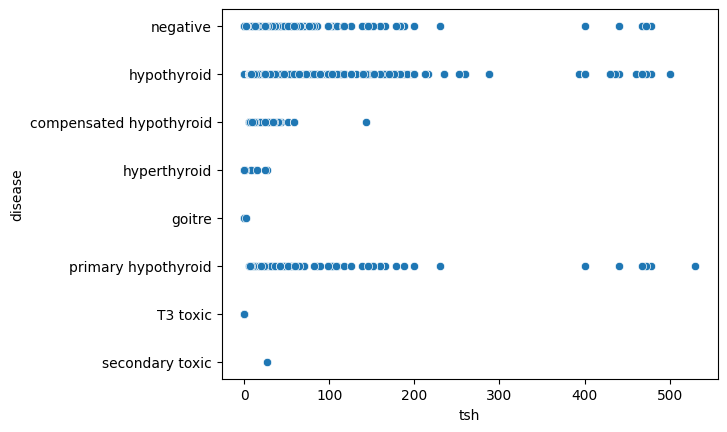

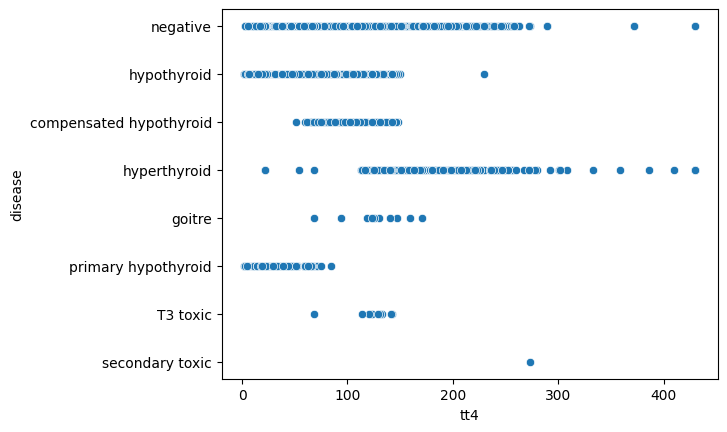

In [20]:
for features in num_features:
    sns.scatterplot(x=final_dataset[features], y=final_dataset['disease'])
    plt.show()

- All outliers may also useful in detection of disease category hence outlier removal is not necessary

In [21]:
final_dataset['disease'].value_counts()

disease
negative                   5713
hypothyroid                 652
hyperthyroid                249
compensated hypothyroid     148
primary hypothyroid          73
goitre                       10
T3 toxic                      9
secondary toxic               1
disease                       1
Name: count, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

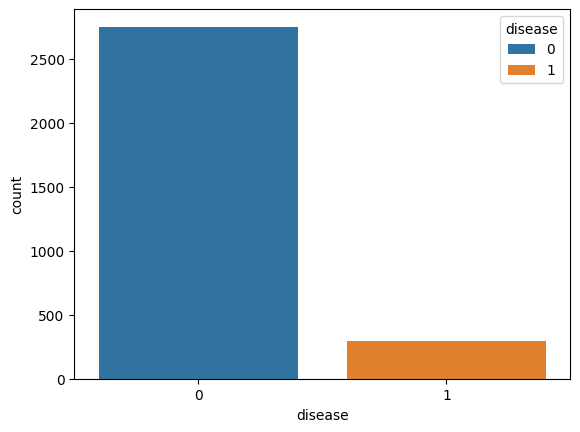

In [200]:
sns.countplot(data=final_dataset,x=final_dataset['disease'],hue='disease')